In [1]:
import tensorflow as tf

from tensorflow.keras import layers,datasets,models

In [18]:
# load the IMDB dataset

(train_data, train_labels), (test_data, test_labels) = datasets.imdb.load_data(num_words=10000)

# pad the data to make sure all the sequences are the same length

train_data = tf.keras.preprocessing.sequence.pad_sequences(train_data, value=0, padding='post', maxlen=256)


test_data = tf.keras.preprocessing.sequence.pad_sequences(test_data, value=0, padding='post', maxlen=256)

# create the model

model = models.Sequential()

model.add(layers.Embedding(10000, 16))

# compile the model

model.add(layers.GlobalAveragePooling1D())

model.add(layers.Dense(32, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# train the model

history = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels))


# evaluate the model

results = model.evaluate(test_data, test_labels)

print(results)

# predict the sentiment of a review

import numpy as np

review = "The movie was not good. The animation and the graphics were terrible. I would not recommend this movie."

words = review.split()

word_index = datasets.imdb.get_word_index()

review = [word_index.get(word, 0) for word in words]  # Use word_index.get() to handle missing words

review = tf.keras.preprocessing.sequence.pad_sequences([review], value=0, padding='post', maxlen=256)

prediction = model.predict(review)

print(prediction[0][0])

if prediction[0][0] > 0.5:
    print("Positive review")
else:
    print("Negative review")



Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5551 - loss: 0.6914 - val_accuracy: 0.6732 - val_loss: 0.6773
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6705 - loss: 0.6652 - val_accuracy: 0.7202 - val_loss: 0.6138
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7763 - loss: 0.5807 - val_accuracy: 0.7913 - val_loss: 0.5144
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8225 - loss: 0.4741 - val_accuracy: 0.8392 - val_loss: 0.4248
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8521 - loss: 0.3958 - val_accuracy: 0.8512 - val_loss: 0.3740
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8694 - loss: 0.3415 - val_accuracy: 0.8478 - val_loss: 0.3539
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8798 - loss: 0.3091 - val_accuracy: 0.8696 - val_loss: 0.3240
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8912 - loss: 0.2844 - val_accuracy: 0.8710 - v

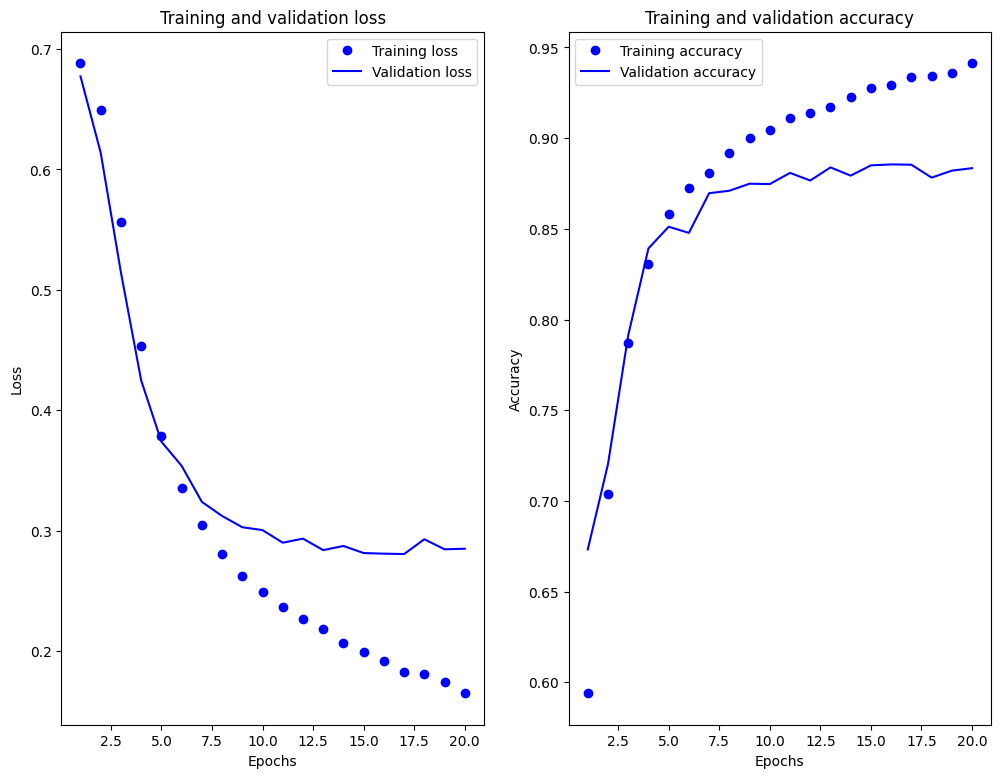

In [19]:
# plotting the training and validation loss and training and validation accuracy in subplots

import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']

val_loss_values = history_dict['val_loss']

acc_values = history_dict['accuracy']

val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 9))

plt.subplot(1, 2, 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')

plt.plot(epochs, val_loss_values, 'b', label='Validation loss')

plt.title('Training and validation loss')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.legend()

plt.subplot(1, 2, 2)

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')

plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')

plt.title('Training and validation accuracy')

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.legend()

plt.show()

